In [1]:
import pandas as pd
crop_pred=pd.read_csv('updated_crop.csv')
print(len(crop_pred))
crop_pred.head()

KeyboardInterrupt: 

In [ ]:
crop_pred.drop('Unnamed: 0',inplace=True,axis=1)

<Axes: >

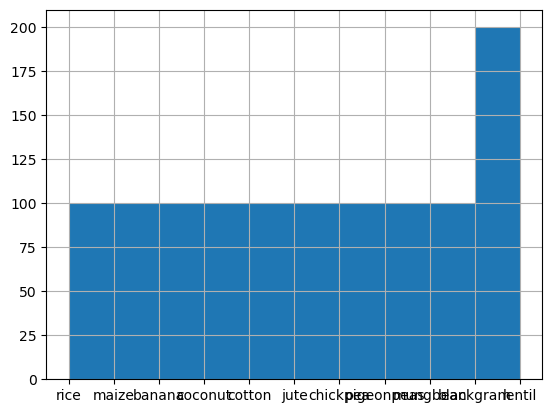

In [ ]:
crop_pred['label'].hist()

# Splitling the data

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(24)
x=crop_pred.drop('label',axis=1)
y=crop_pred['label']
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.3)
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.2)


# Using Linear SVC 
using two train test ratios

1-7:3

2-8:2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def generateheatmap(confmat,xlab):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,15))
    ylab=list(xlab)
    sns.heatmap(confmat,ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(xlab)
    ax.yaxis.set_ticklabels(ylab)
    ax.plot()
   

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

accuracy: 74.55 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        29
   blackgram       0.80      0.36      0.50        33
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      cotton       0.90      0.84      0.87        32
        jute       0.32      1.00      0.49        36
      lentil       1.00      0.64      0.78        22
       maize       0.00      0.00      0.00        28
    mungbean       1.00      1.00      1.00        30
  pigeonpeas       0.91      0.94      0.92        32
        rice       1.00      0.29      0.44        28

    accuracy                           0.75       330
   macro avg       0.81      0.73      0.73       330
weighted avg       0.80      0.75      0.73       330



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


accuracy in cross validation: 78.64 percent


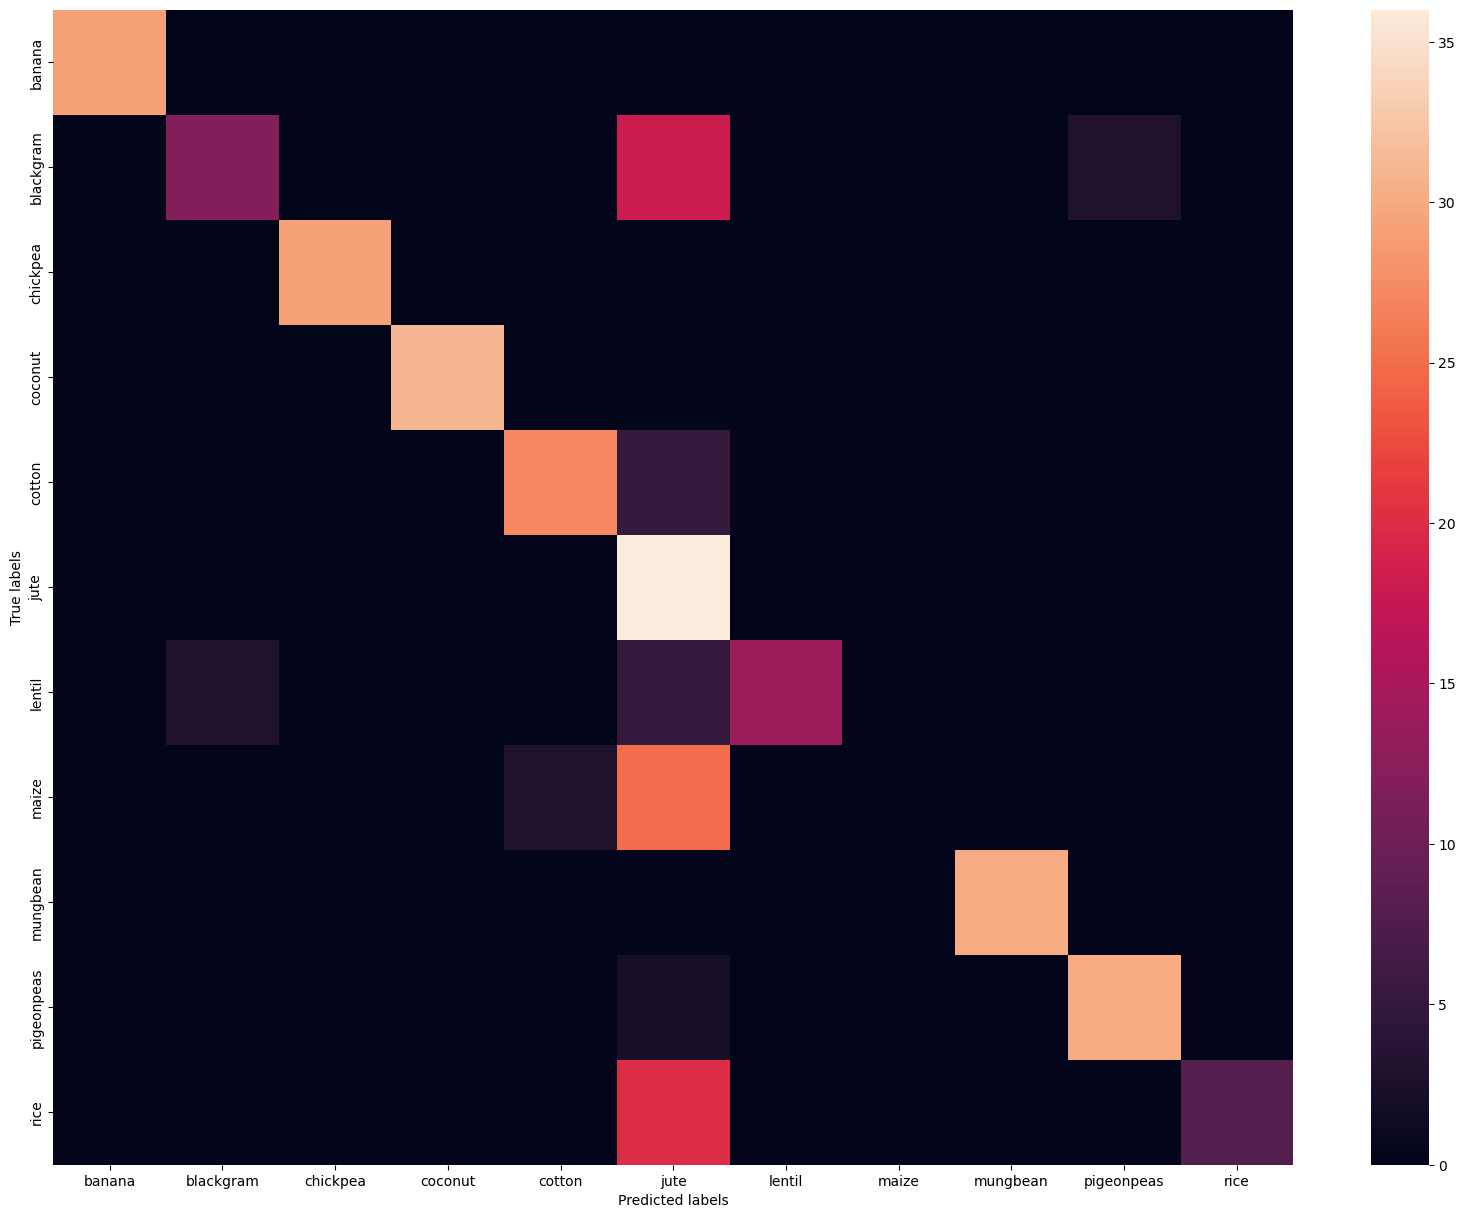

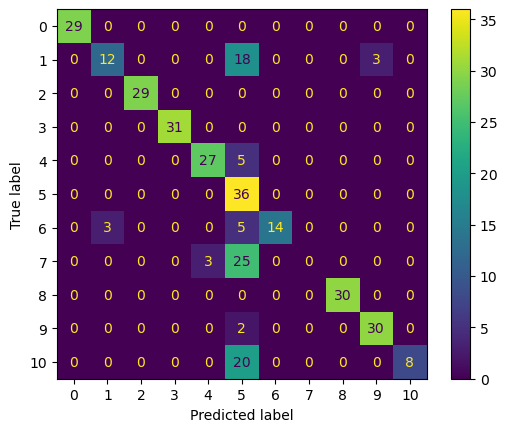

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
linsvc1=LinearSVC()
linsvc1.fit(x1_train,y1_train)
score=linsvc1.score(x1_test,y1_test)
print('accuracy:',('%.2f percent')%(score*100))
y1_pred=linsvc1.predict(x1_test)
x_label=linsvc1.classes_
print(classification_report(y1_test,y1_pred))
cf=confusion_matrix(y1_test,y1_pred)
generateheatmap(cf,x_label)
c=ConfusionMatrixDisplay(cf)
c.plot()
cross=cross_val_score(linsvc1,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

accuracy: 82.27 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       0.37      1.00      0.54        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      0.61      0.76        18
        jute       0.68      0.93      0.79        14
      lentil       1.00      0.60      0.75        15
       maize       0.00      0.00      0.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      0.96      0.98        25
        rice       0.94      0.81      0.87        21

    accuracy                           0.82       220
   macro avg       0.82      0.81      0.79       220
weighted avg       0.83      0.82      0.80       220



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


accuracy in cross validation: 80.91 percent


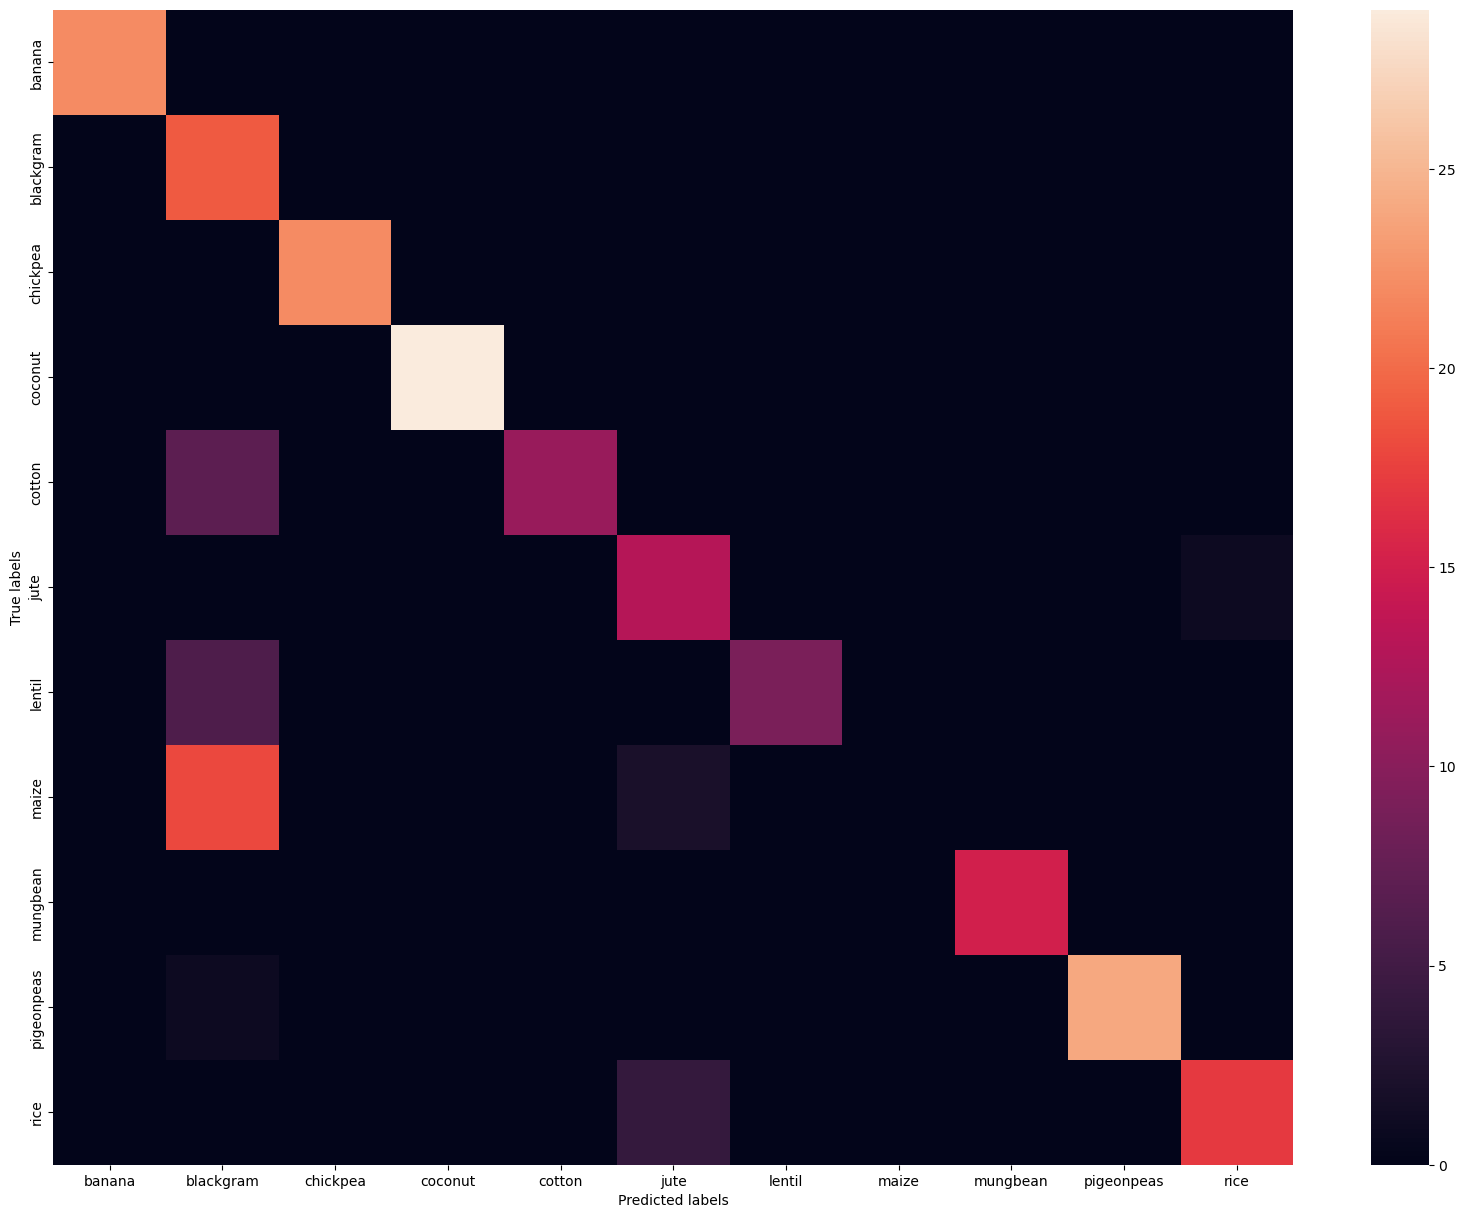

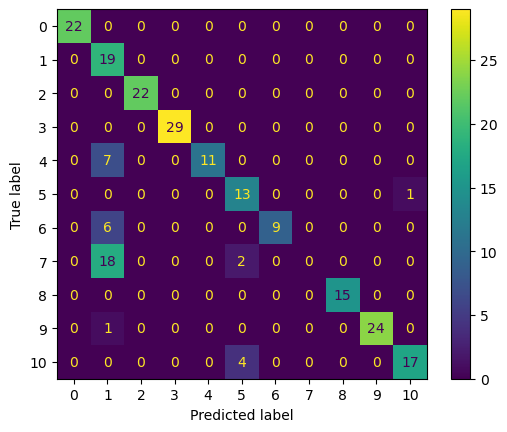

In [ ]:
linsvc2=LinearSVC()
linsvc2.fit(x2_train,y2_train)
score=linsvc2.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=linsvc2.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
generateheatmap(cf,linsvc2.classes_)
c=ConfusionMatrixDisplay(cf)
c.plot()
cross=cross_val_score(linsvc2,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))


# Using KNeighbors classifier
using two train test ratios

1-7:3

2-8:2

accuracy: 96.06 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        29
   blackgram       0.97      1.00      0.99        33
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      cotton       0.94      1.00      0.97        32
        jute       0.88      0.83      0.86        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.93      0.96        28
    mungbean       1.00      1.00      1.00        30
  pigeonpeas       1.00      0.97      0.98        32
        rice       0.80      0.86      0.83        28

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

accuracy in cross validation: 97.36 percent


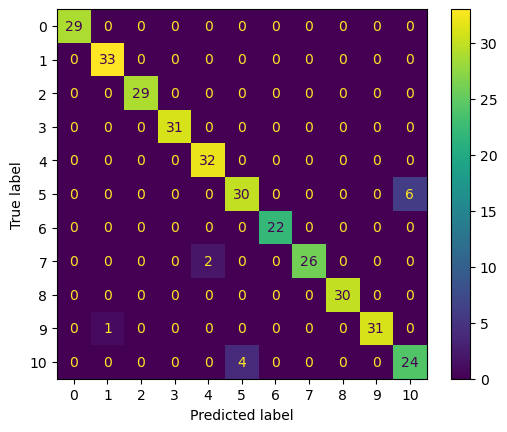

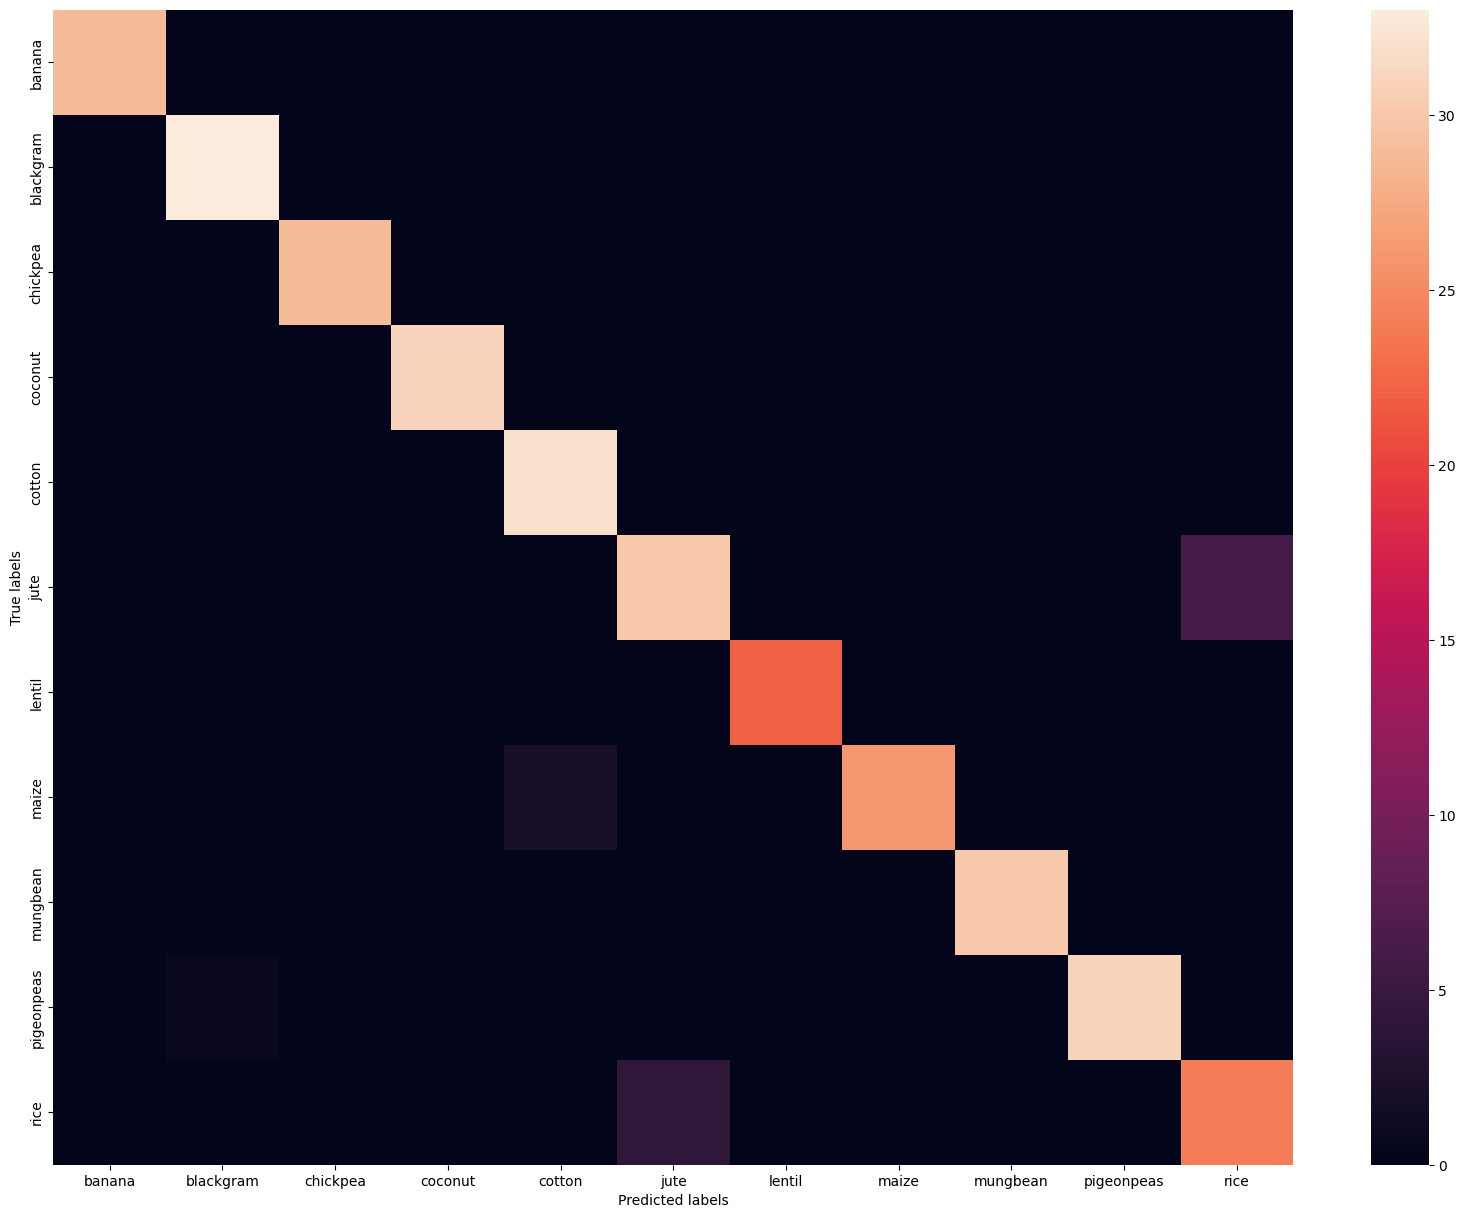

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1mod=KNeighborsClassifier()
knn1mod.fit(x1_train,y1_train)
score=knn1mod.score(x1_test,y1_test)
print('accuracy:',('%.2f percent')%(score*100))
y1_pred=knn1mod.predict(x1_test)
print(classification_report(y1_test,y1_pred))
cf=confusion_matrix(y1_test,y1_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,knn1mod.classes_)
cross=cross_val_score(knn1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

accuracy: 98.18 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        14
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      0.96      0.98        25
        rice       0.95      0.90      0.93        21

    accuracy                           0.98       220
   macro avg       0.98      0.98      0.98       220
weighted avg       0.98      0.98      0.98       220

accuracy in cross validation: 97.36 percent


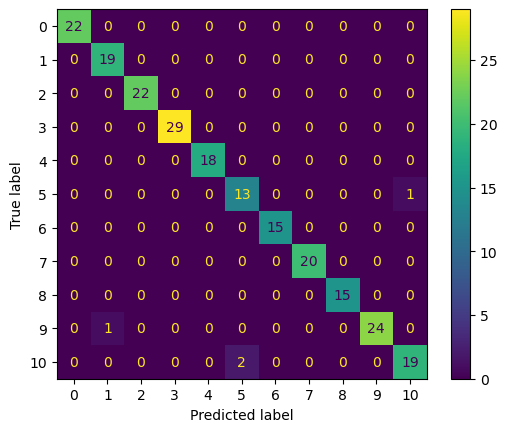

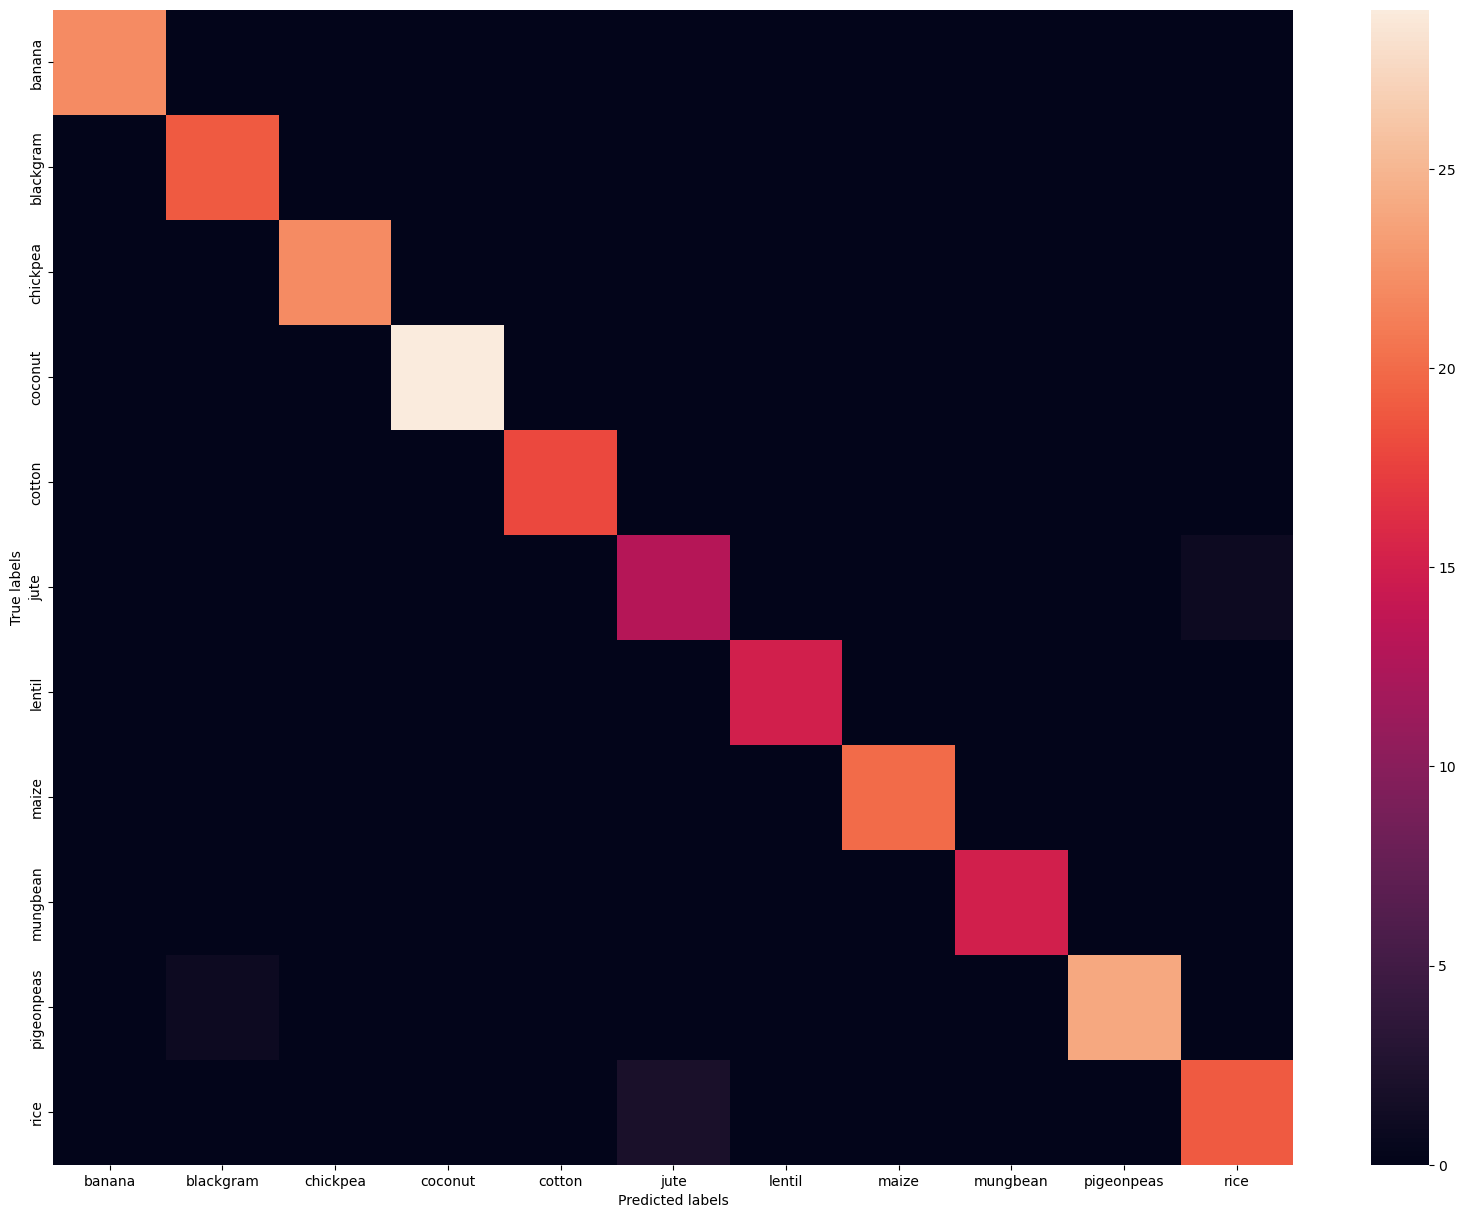

In [ ]:
knn2mod=KNeighborsClassifier()
knn2mod.fit(x2_train,y2_train)
score=knn1mod.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=knn1mod.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,knn2mod.classes_)
cross=cross_val_score(knn2mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

# Using SVC classifier
using two train test ratios

1-7:3

2-8:2

accuracy: 97.58 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        29
   blackgram       0.97      1.00      0.99        33
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      cotton       0.97      1.00      0.98        32
        jute       0.88      0.97      0.92        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        28
    mungbean       1.00      1.00      1.00        30
  pigeonpeas       1.00      0.97      0.98        32
        rice       0.96      0.82      0.88        28

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

accuracy in cross validation: 97.36 percent


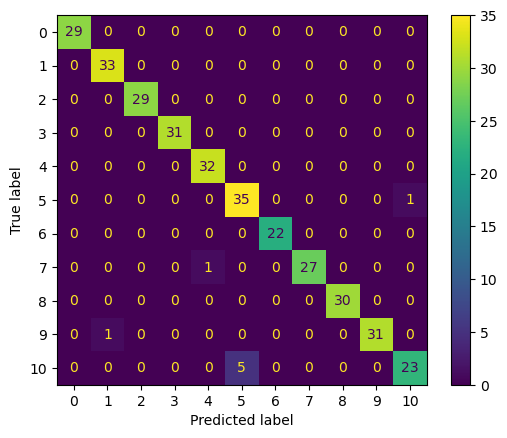

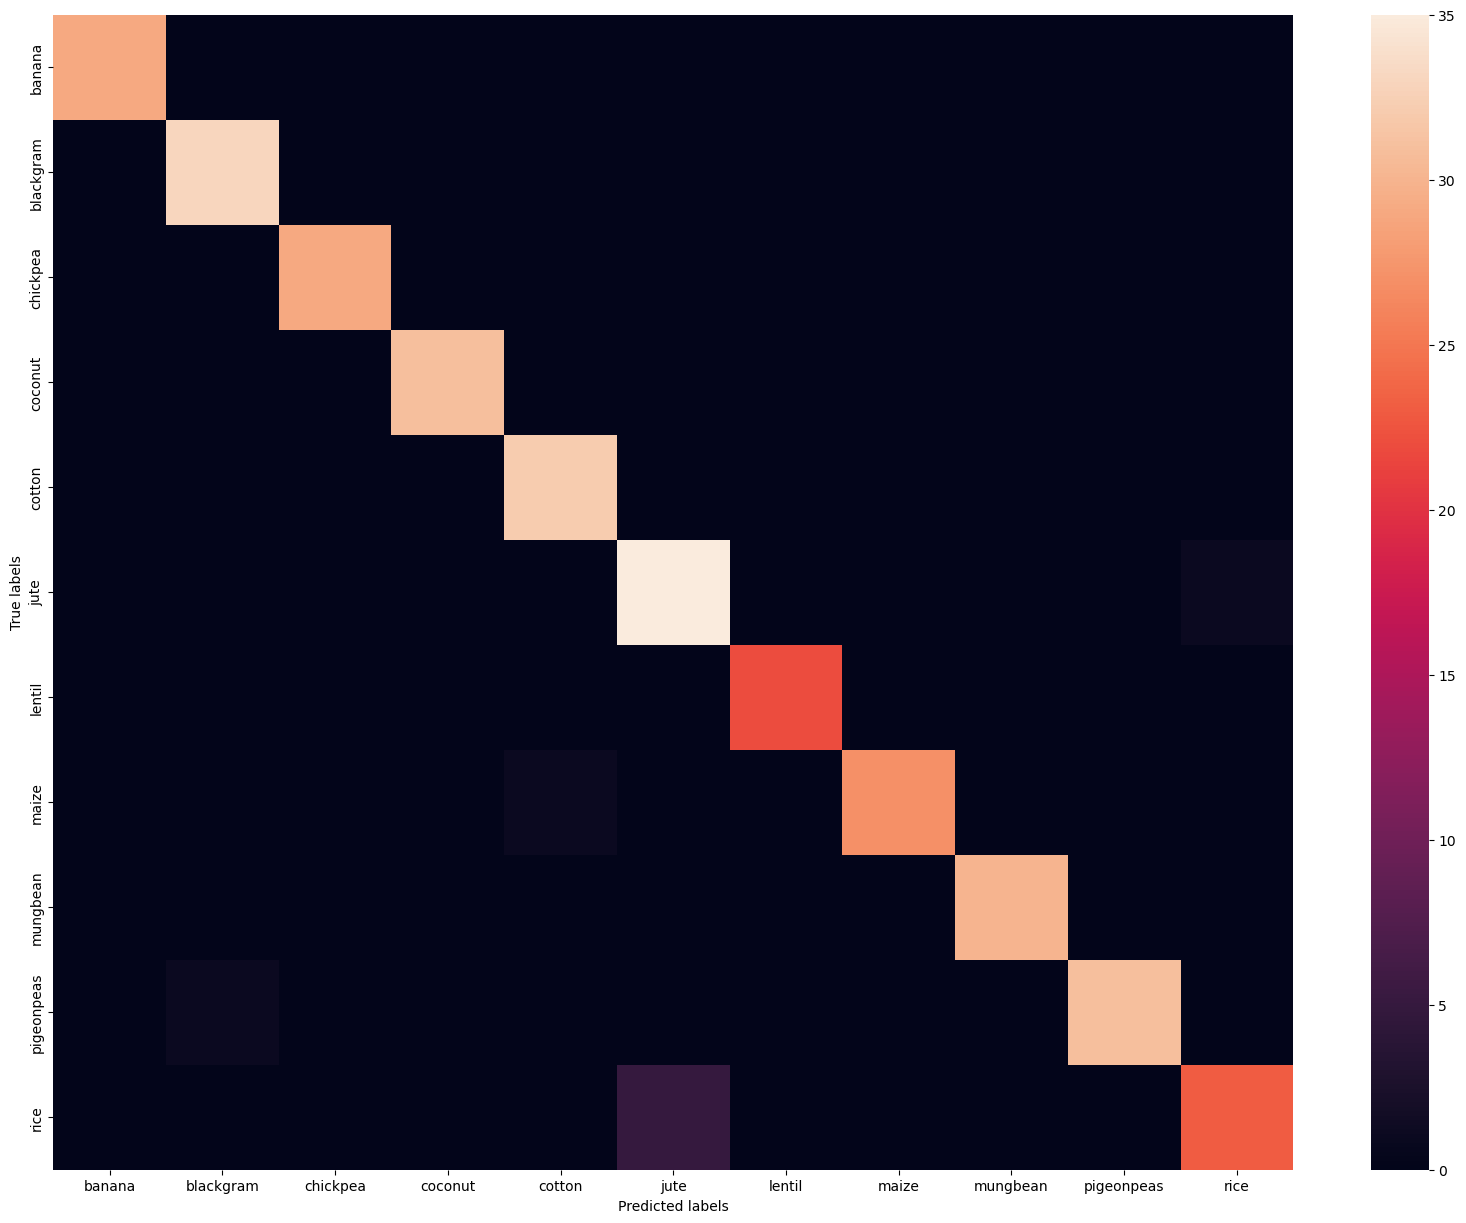

In [ ]:
from sklearn.svm import SVC
svc1mod=SVC()
svc1mod.fit(x1_train,y1_train)
score=svc1mod.score(x1_test,y1_test)
print('accuracy:',('%.2f percent')%(score*100))
y1_pred=svc1mod.predict(x1_test)
print(classification_report(y1_test,y1_pred))
cf=confusion_matrix(y1_test,y1_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,svc1mod.classes_)
cross=cross_val_score(svc1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

accuracy: 96.82 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        18
        jute       0.70      1.00      0.82        14
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      0.96      0.98        25
        rice       1.00      0.71      0.83        21

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.96       220
weighted avg       0.98      0.97      0.97       220

accuracy in cross validation: 97.36 percent


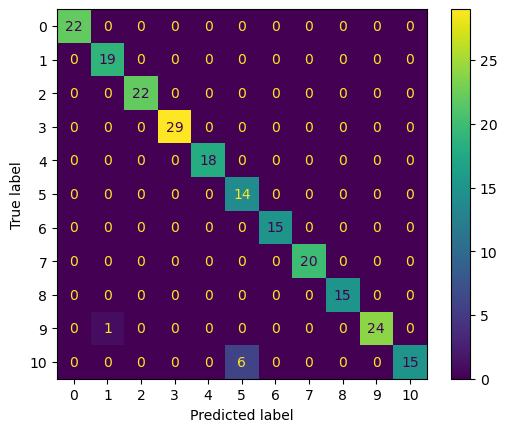

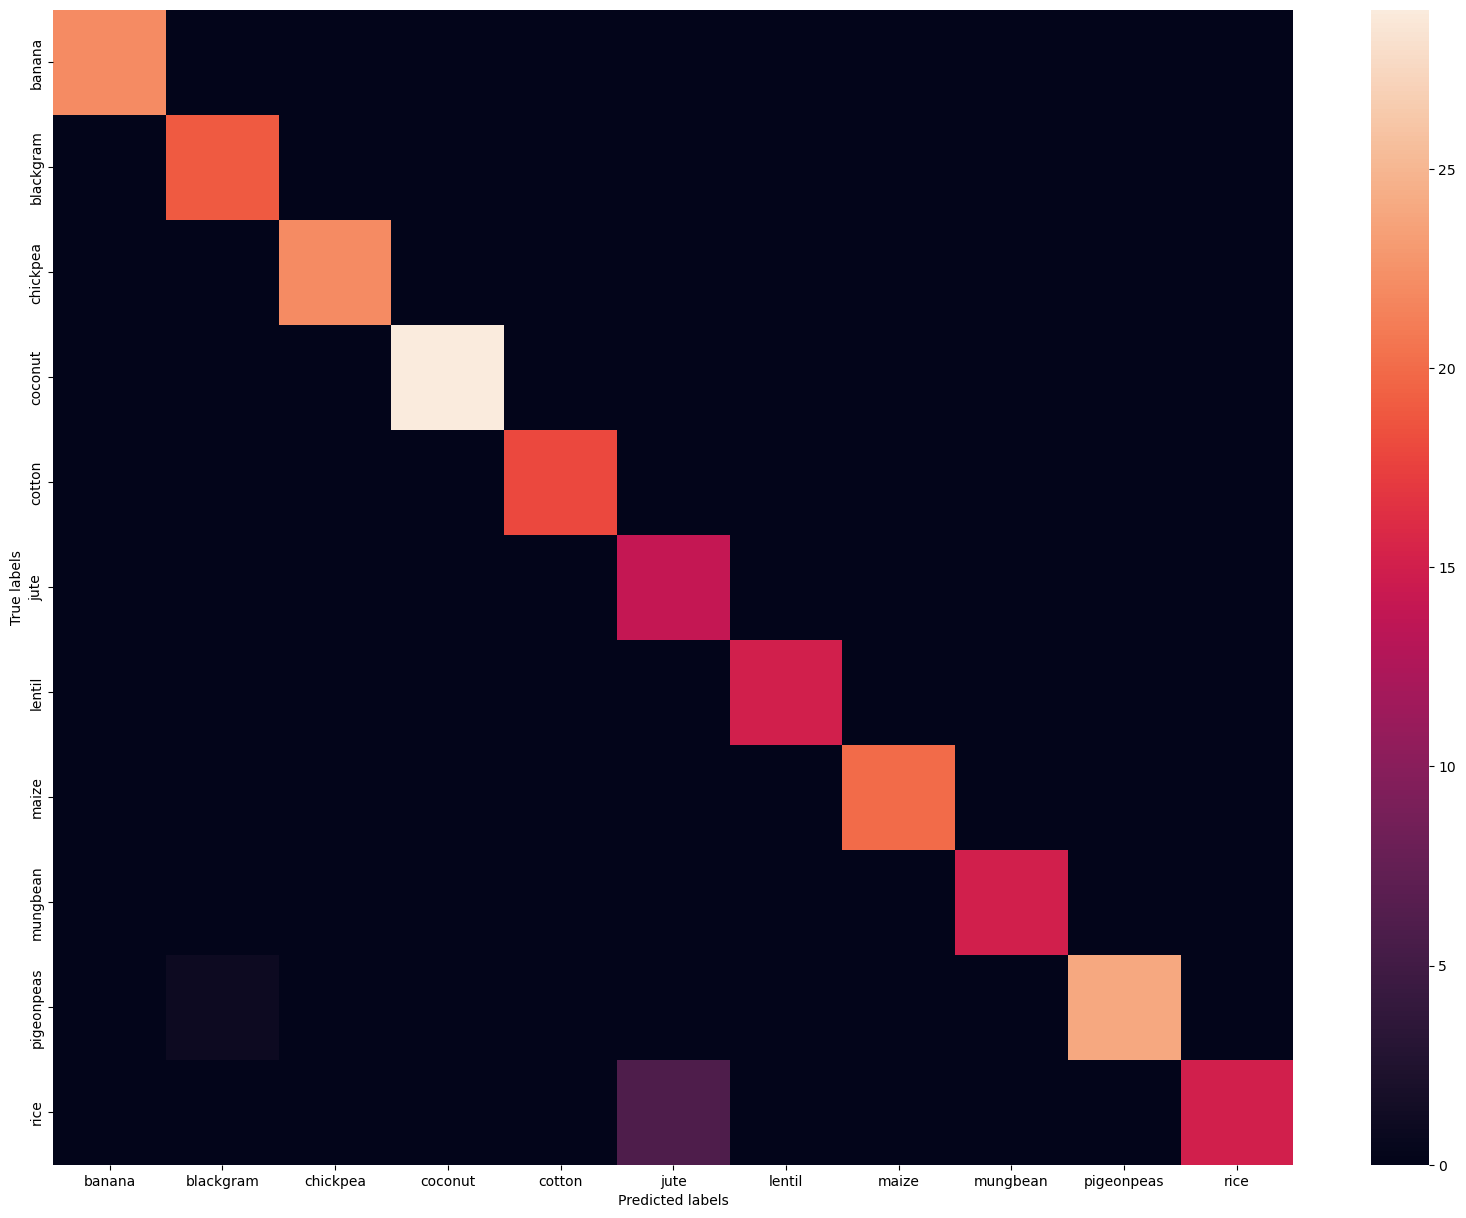

In [ ]:
svc2mod=SVC()
svc2mod.fit(x2_train,y2_train)
score=svc2mod.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=svc2mod.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,svc2mod.classes_)
cross=cross_val_score(svc2mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

# Using Random forest classifier
using two train test ratios

1-7:3

2-8:2

accuracy: 99.39 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        33
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        32
        jute       0.97      0.97      0.97        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        28
    mungbean       1.00      1.00      1.00        30
  pigeonpeas       1.00      1.00      1.00        32
        rice       0.96      0.96      0.96        28

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

accuracy in cross validation: 99.18 percent


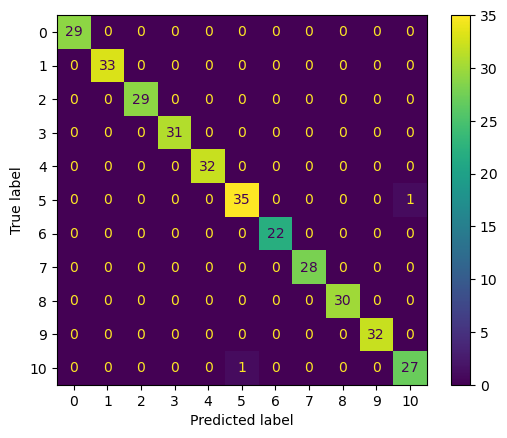

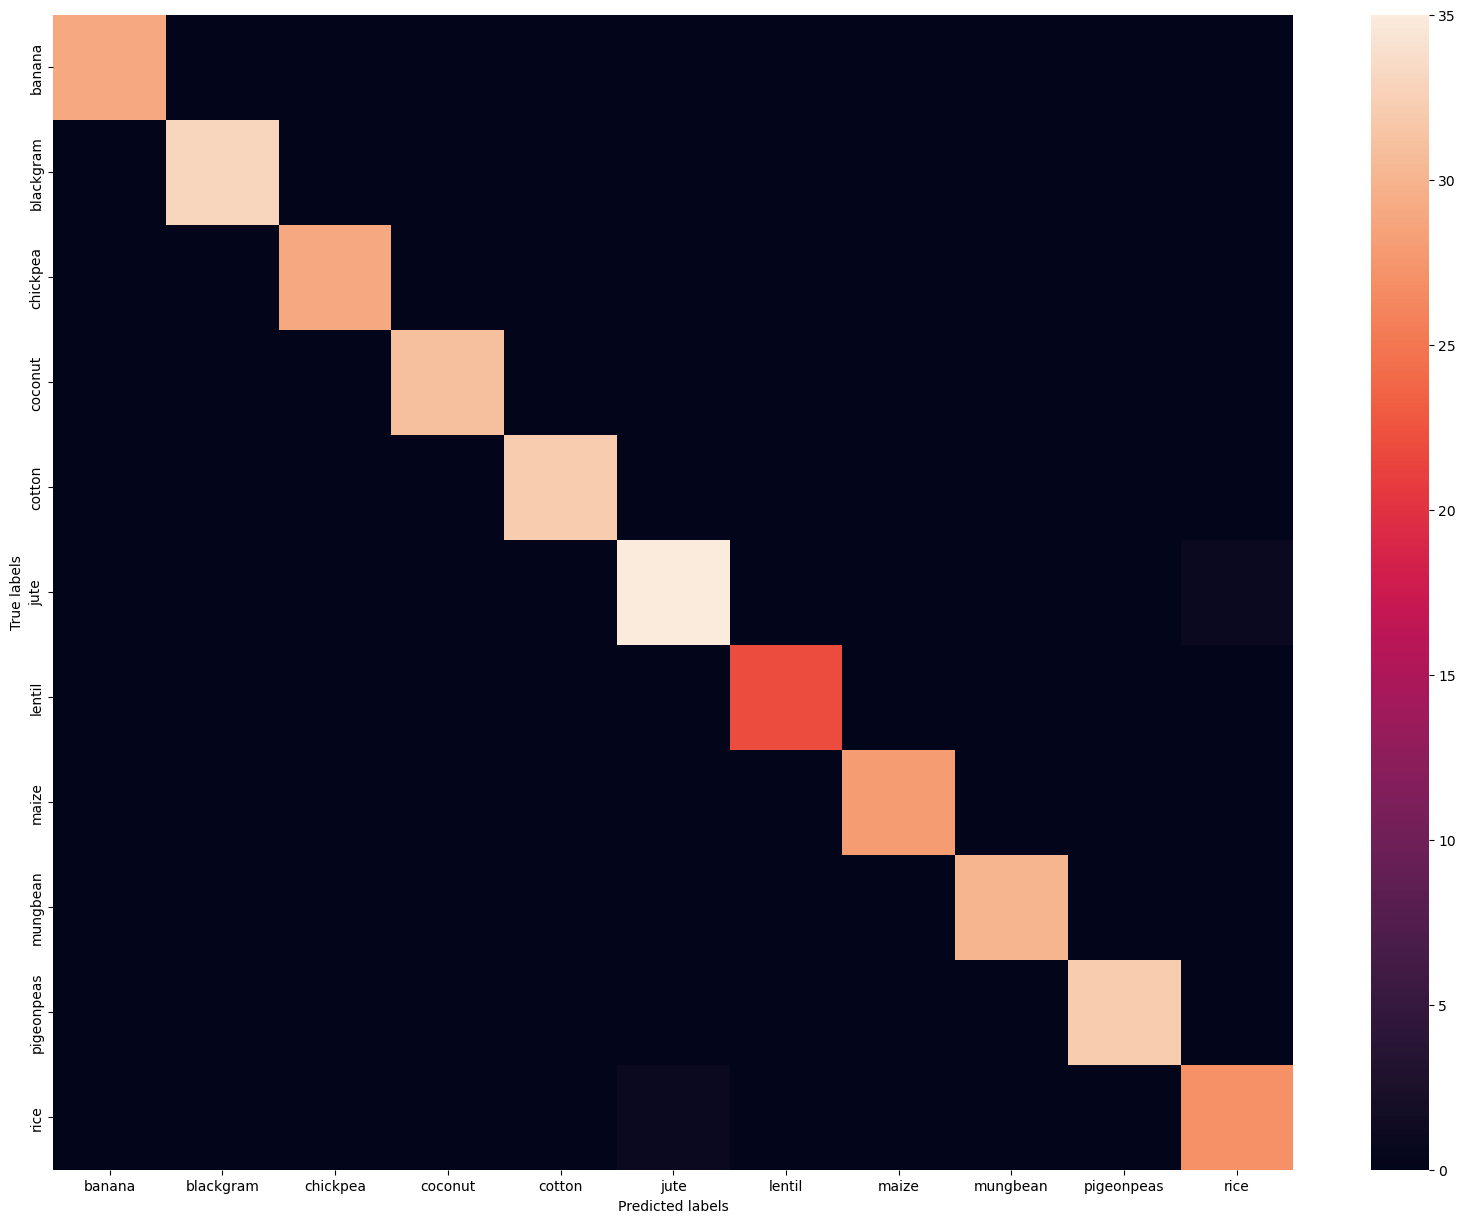

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand1mod=RandomForestClassifier()
rand1mod.fit(x1_train,y1_train)
score=rand1mod.score(x1_test,y1_test)
print('accuracy:',('%.2f percent')%(score*100))
y1_pred=rand1mod.predict(x1_test)
print(classification_report(y1_test,y1_pred))
cf=confusion_matrix(y1_test,y1_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,rand1mod.classes_)
cross=cross_val_score(rand1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

accuracy: 99.09 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        14
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        25
        rice       1.00      0.90      0.95        21

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220

accuracy in cross validation: 97.36 percent


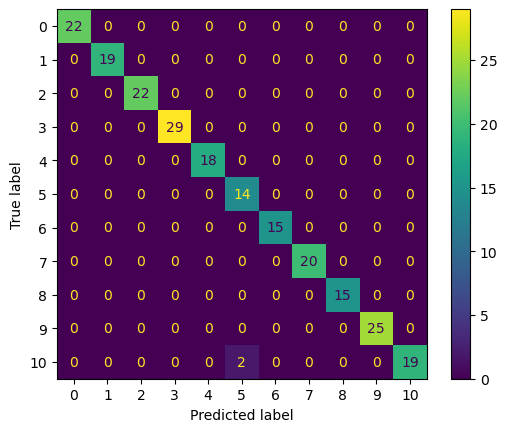

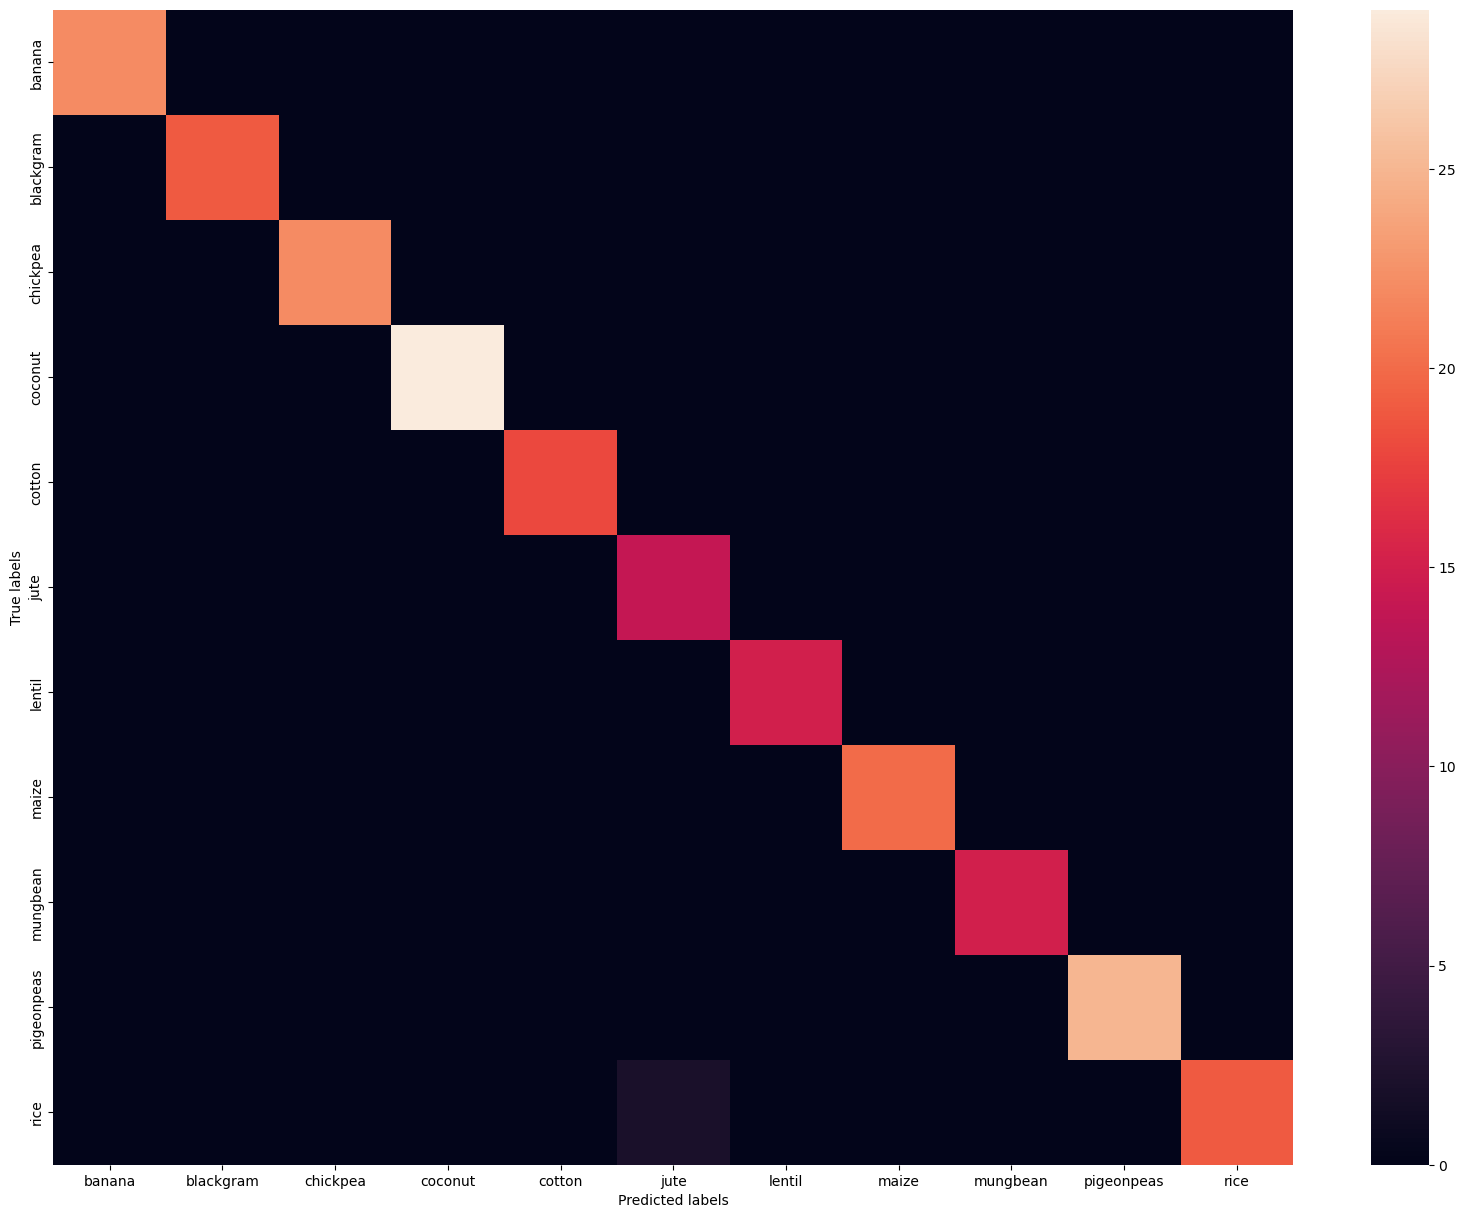

In [ ]:
rand2mod=RandomForestClassifier()
rand2mod.fit(x2_train,y2_train)
score=rand2mod.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=rand2mod.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,rand2mod.classes_)
cross=cross_val_score(knn1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

In [ ]:
rand1mod.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cate={'criterion':['gini', 'entropy', 'log_loss'],'min_samples_split':[2,6,10,20,30],'max_features':['sqrt', 'log2', None],'n_estimators':[100,125,150,200]}

# using random search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randmod=RandomForestClassifier()

In [ ]:
randcv=RandomizedSearchCV(randmod,cate,n_iter=10,cv=2,n_jobs=-1)
randcv.fit(x1_train,y1_train)
randcv.best_params_

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 6, 10, 20, 30],
                                        'n_estimators': [100, 125, 150, 200]})

In [ ]:
randcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [ ]:
randcv.score(x1_test,y1_test)

0.990909090909091

accuracy: 98.64 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        14
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        25
        rice       1.00      0.86      0.92        21

    accuracy                           0.99       220
   macro avg       0.98      0.99      0.98       220
weighted avg       0.99      0.99      0.99       220

accuracy in cross validation: 97.36 percent


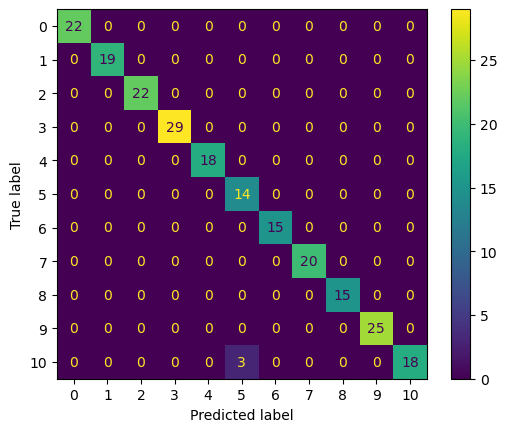

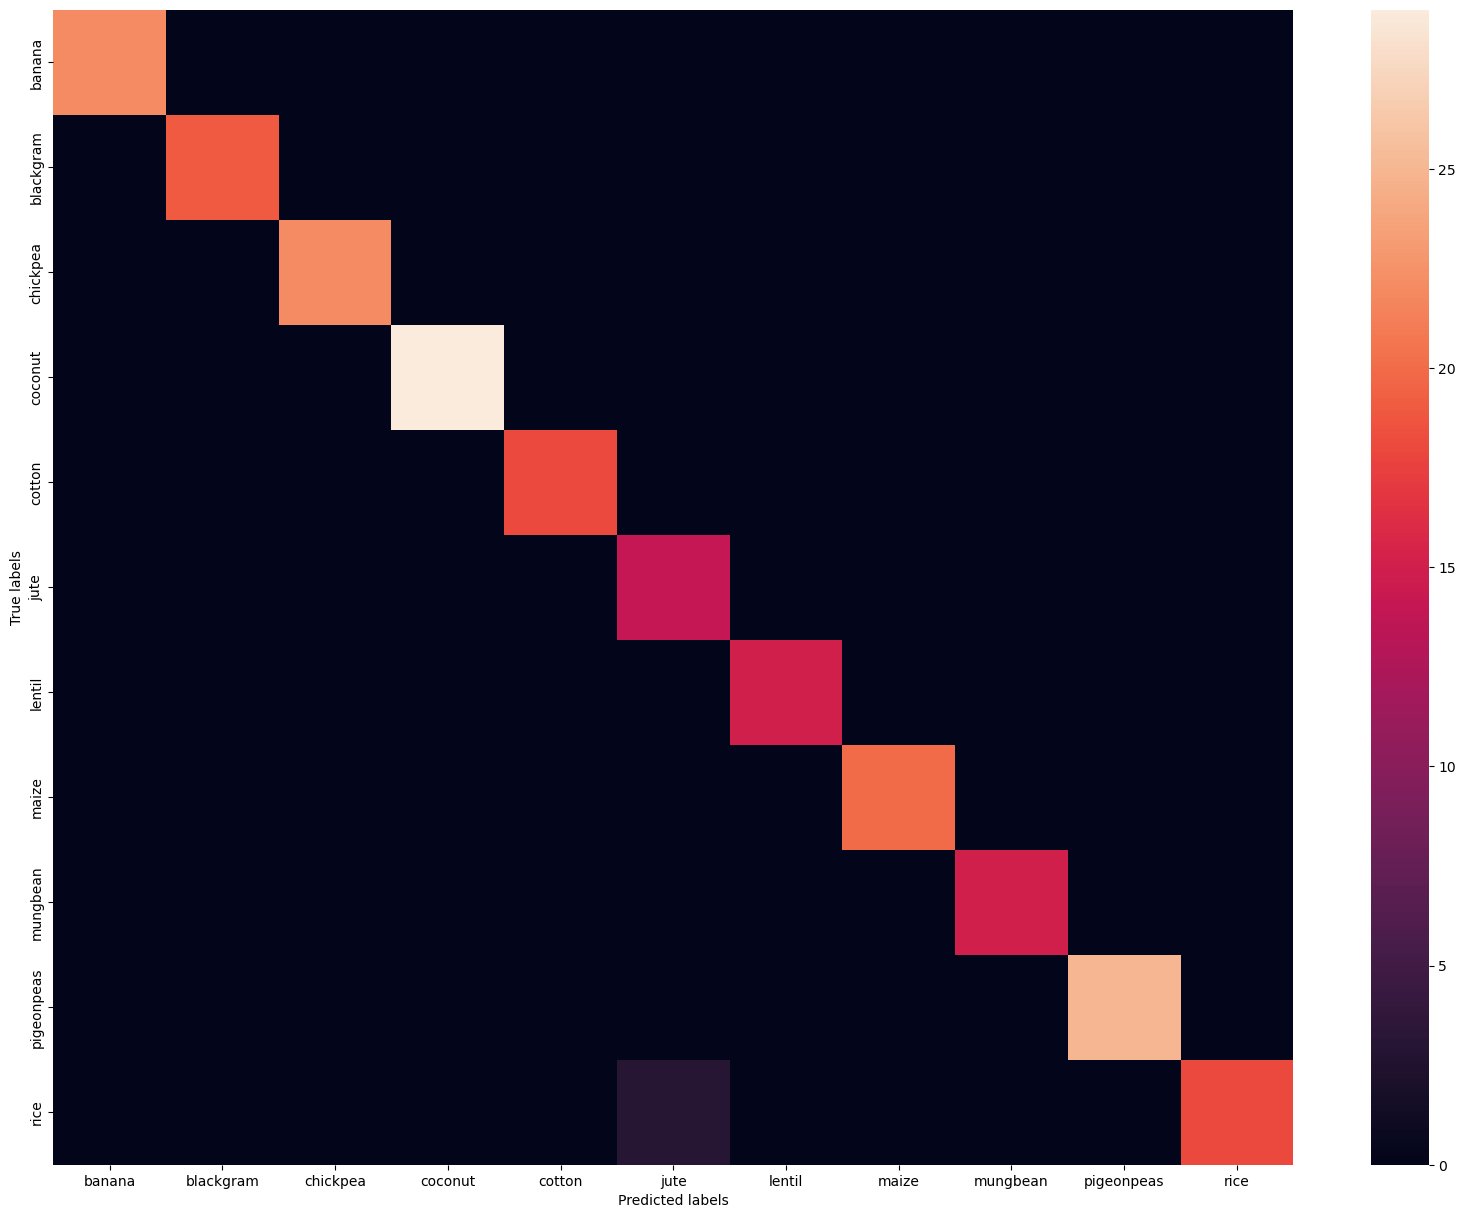

In [ ]:
rand2mod=RandomForestClassifier(n_estimators=150,min_samples_split=2,max_features='log2',criterion='entropy')
rand2mod.fit(x2_train,y2_train)
score=rand2mod.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=rand2mod.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,rand2mod.classes_)
cross=cross_val_score(knn1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))

# using grid searchcv

In [ ]:
from sklearn.model_selection import GridSearchCV
gridranmod=RandomForestClassifier()

In [ ]:
gridcv=GridSearchCV(gridranmod,cate,n_jobs=-1,cv=2)
gridcv.fit(x1_train,y1_train)
gridcv.score(x1_test,y1_test)

0.990909090909091

In [ ]:
gridcv.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 200}

accuracy: 98.64 percent
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        14
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        25
        rice       1.00      0.86      0.92        21

    accuracy                           0.99       220
   macro avg       0.98      0.99      0.98       220
weighted avg       0.99      0.99      0.99       220

accuracy in cross validation: 97.36 percent


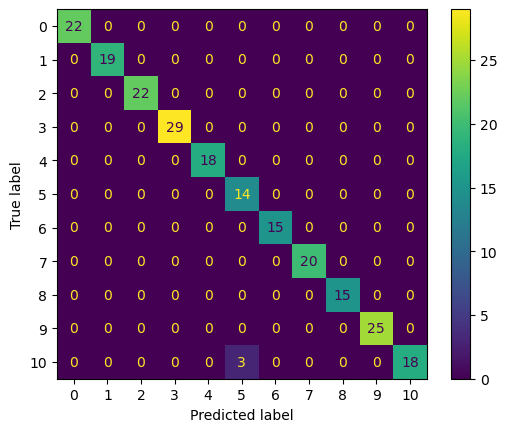

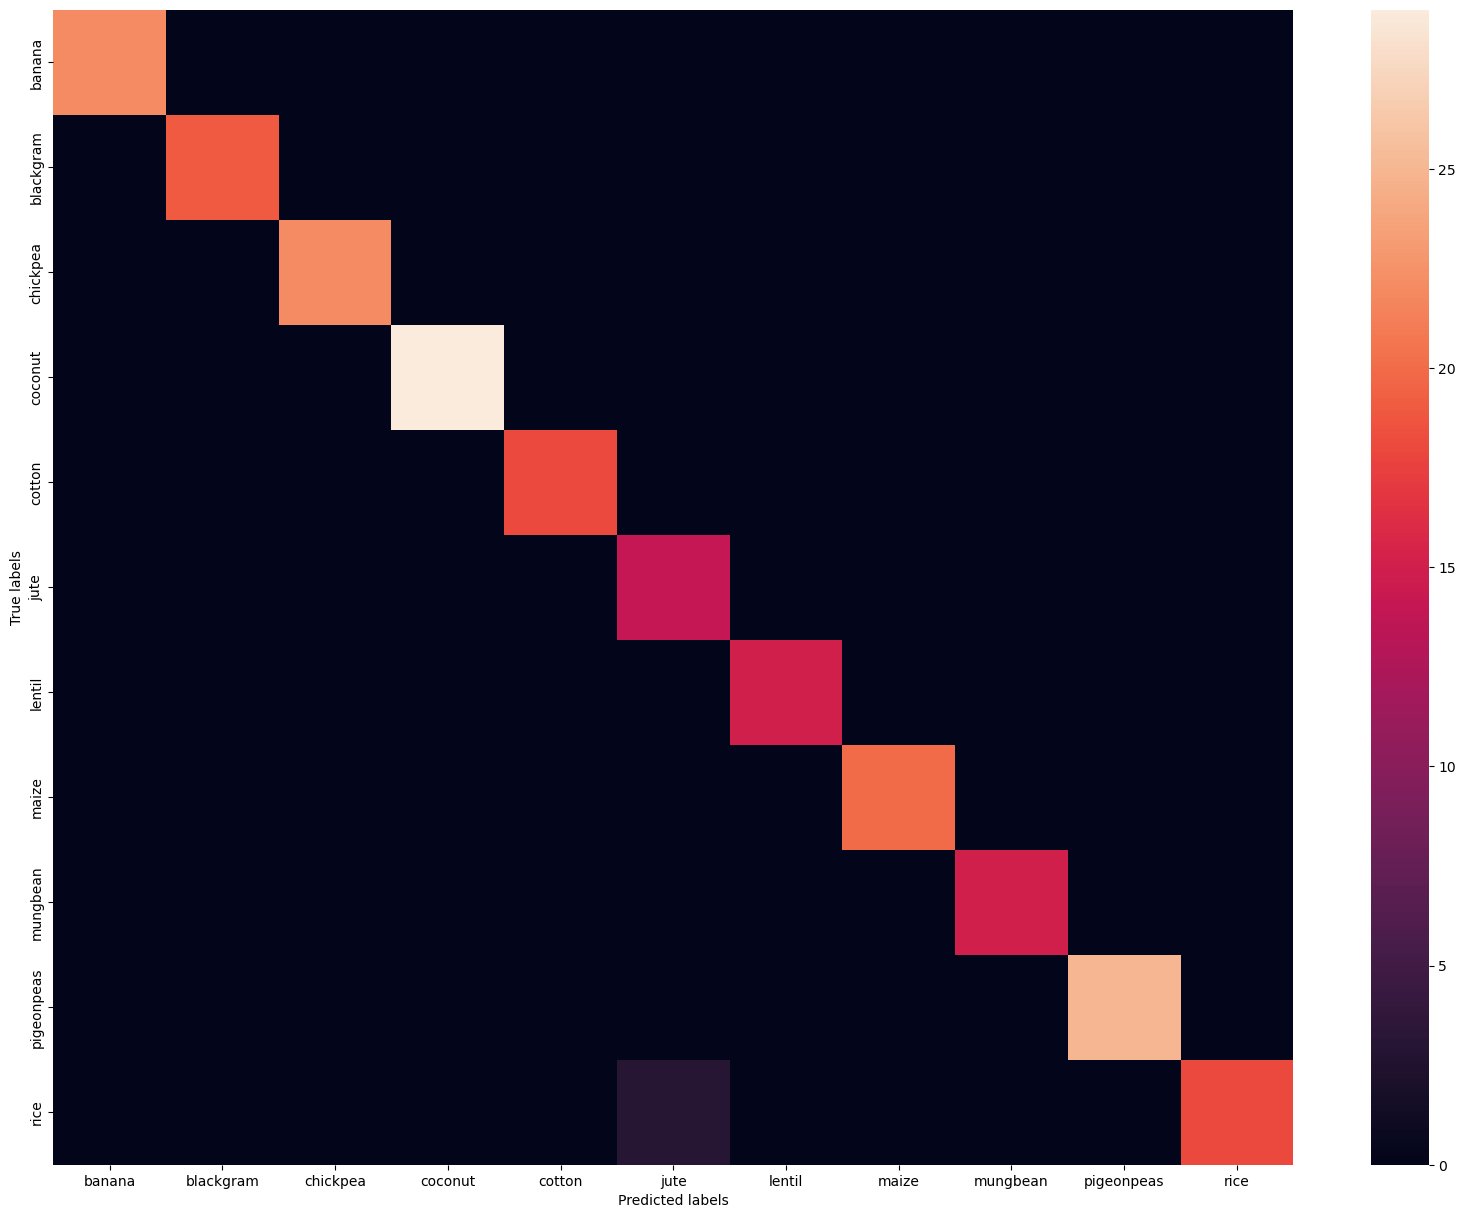

In [ ]:
rand2mod=RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features='log2',criterion='gini')
rand2mod.fit(x2_train,y2_train)
score=rand2mod.score(x2_test,y2_test)
print('accuracy:',('%.2f percent')%(score*100))
y2_pred=rand2mod.predict(x2_test)
print(classification_report(y2_test,y2_pred))
cf=confusion_matrix(y2_test,y2_pred)
c=ConfusionMatrixDisplay(cf)
c.plot()
generateheatmap(cf,rand2mod.classes_)
cross=cross_val_score(knn1mod,x,y,cv=5)
crossmean=np.mean(cross)
print('accuracy in cross validation:',('%.2f percent')%(crossmean*100))
